In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ticktack
from ticktack import fitting
import os
from matplotlib.lines import Line2D
import matplotlib as mpl
import seaborn as sns
mpl.style.use('seaborn-colorblind')
colours = (plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [2]:
def arrival_solar2(start, phi):
    return (start + phi  + 11/4) % 11

In [3]:
events = ["775AD-late-N", "993AD", "5410BCE"]
titles = ["775CE", "993CE", "5410BCE"]
cbm_models = ["Guttler14", "Buntgen18", "Brehm21",]
cbm_names = ["Güttler et al, 2015: 11-box", "Büntgen et al, 2018: 22-box", "Brehm et al, 2021: 22-box"]
colors = ['#0072B2', '#009E73', '#D55E00', '#CC79A7', '#e41a1c', '#56B4E9', '#999999', ]

In [4]:
Guttler14 = np.zeros((12000, 3))
Buntgen18 = np.zeros((12000, 3))
Brehm21 = np.zeros((12000, 3))

for i, event in enumerate(events):
    chain = np.load("chain/{}_Guttler14.npy".format(event))
    Guttler14[:, i] = arrival_solar2(chain[:, 1], chain[:, 3])
for i, event in enumerate(events):
    chain = np.load("chain/{}_Buntgen18.npy".format(event))
    Buntgen18[:, i] = arrival_solar2(chain[:, 1], chain[:, 3])
for i, event in enumerate(events):
    chain = np.load("chain/{}_Brehm21.npy".format(event))
    Brehm21[:, i] = arrival_solar2(chain[:, 1], chain[:, 3])

In [5]:
def remap_year(year):
    return ((year+11/2.) % 11)-11/2.

def remap_arbitrary(year,start):
    return ((year-start) % 11) + start

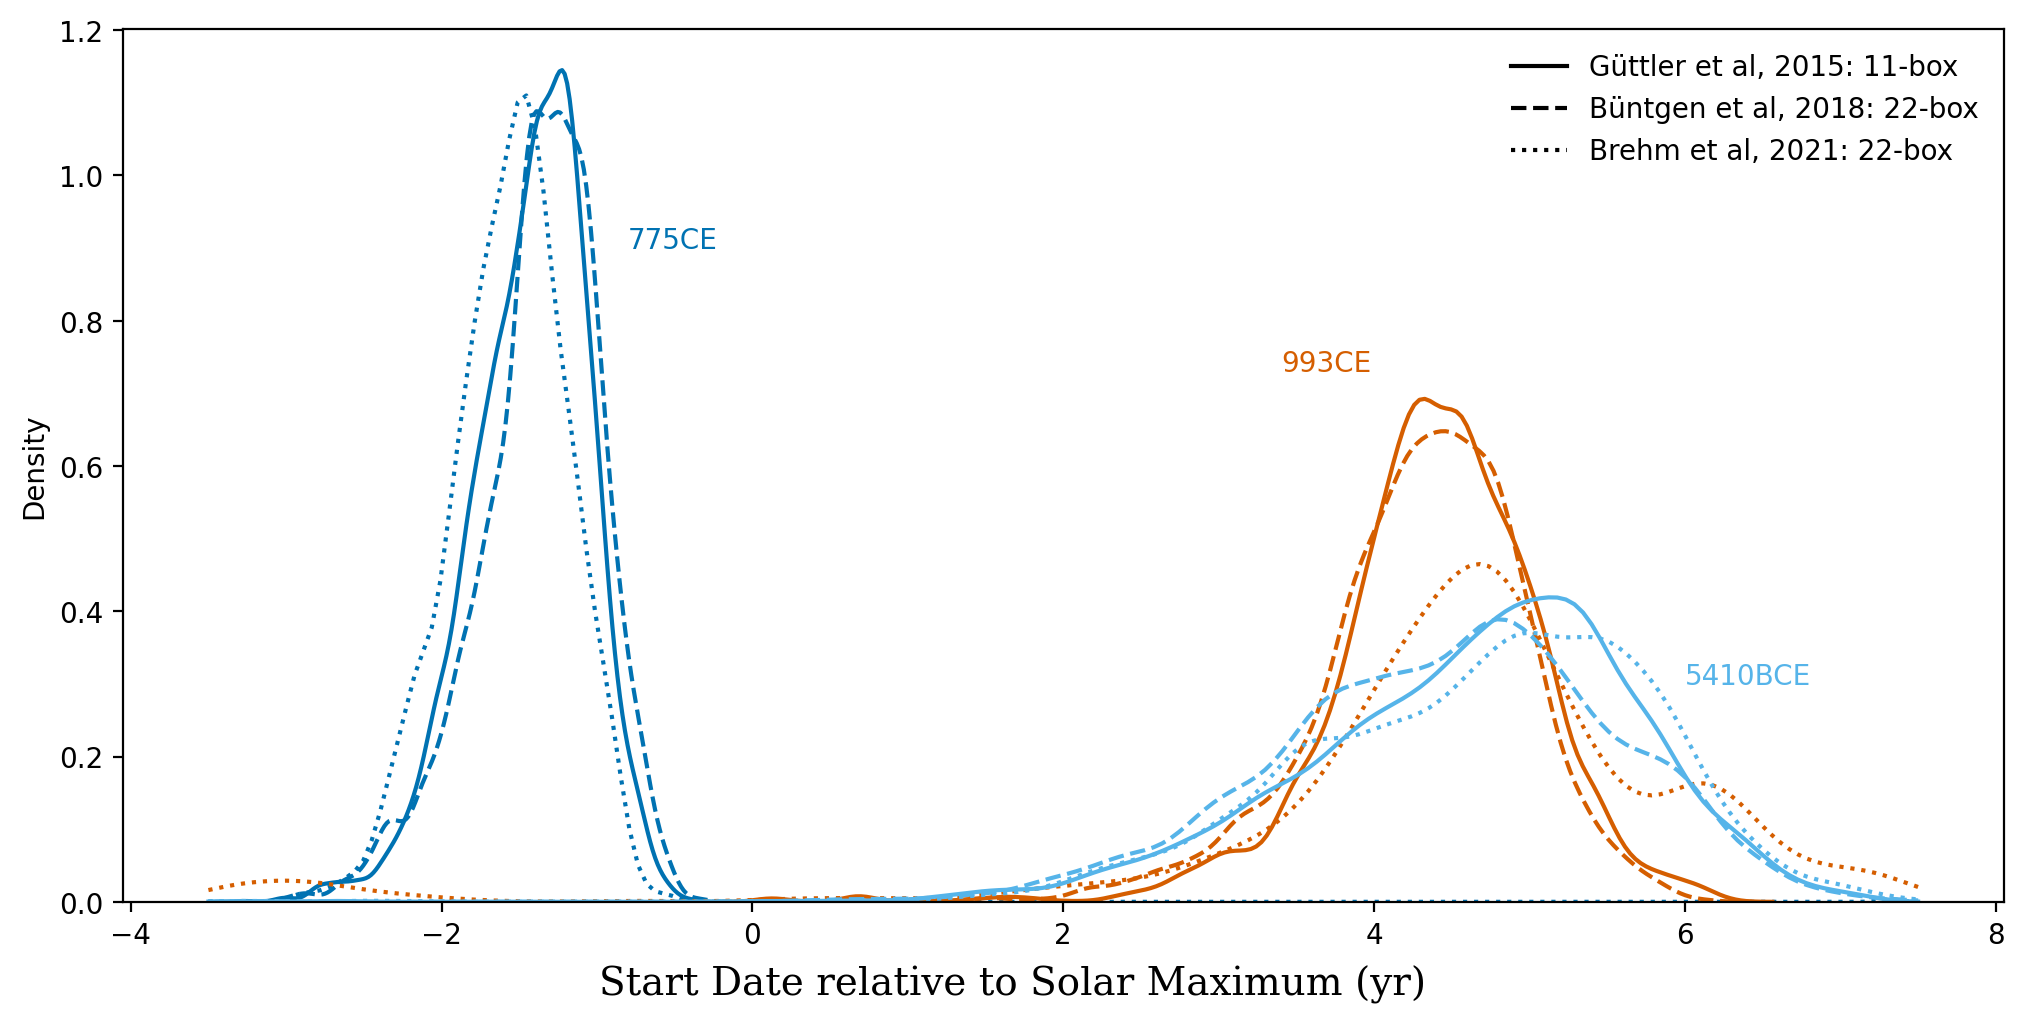

In [6]:
fmt = ["-", "--", ":"]
custom_lines = [Line2D([0], [0], ls=fmt[i], color="k", lw=1.5, label=cbm_names[i]) for i in range(len(cbm_names))]
fig = plt.figure(figsize=(10, 5), dpi=200, constrained_layout=True)
spec = fig.add_gridspec(ncols=1, nrows=1)
ax = fig.add_subplot(spec[0, 0])
colors = ['#0072B2', '#D55E00', '#56B4E9']
start = -11/2+2
for i in range(len(events)):
    sns.kdeplot(remap_arbitrary(Guttler14[:, i],start), ls=fmt[0], color=colors[i], ax=ax, clip=(start, start+11)); 
    sns.kdeplot(remap_arbitrary(Buntgen18[:, i],start), ls=fmt[1], color=colors[i], ax=ax, clip=(start, start+11)); 
    sns.kdeplot(remap_arbitrary(Brehm21[:, i],start), ls=fmt[2], color=colors[i], ax=ax, clip=(start, start+11));
ax.legend(handles=custom_lines, frameon=False, fontsize=10, loc="upper right");
# ax.axes.yaxis.set_visible(False)

plt.text(x=-0.8, y=0.9, s=titles[0], color=colors[0])
plt.text(x=3.4, y=0.73, s=titles[1], color=colors[1])
plt.text(x=6, y=0.3, s=titles[2], color=colors[2])

# plt.axvline(11/2)
fig.supxlabel("Start Date relative to Solar Maximum (yr)", 
              fontsize=14, fontfamily="serif", fontweight="roman");
fig.savefig("solar_cycle_density.pdf",bbox_inches='tight')
fig.savefig("solar_cycle_density.png",bbox_inches='tight')